# Notebook #5: Predicciones

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Para realizar la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split,GridSearchCV

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_ajuste_logistica as sal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- El primer paso consiste en cargar los datos ya estandarizados.

In [34]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo5/df_estandarizado.pkl')

In [35]:
df.sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,...,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
1741,1,0.14921998671995515,0.15829043434542156,0.15121298582262763,0.16409530127528085,0.1641393564503658,0.15106840944144,0.114467,0.268527722820055,0.16610812240938352,...,0.16183617419891674,-1.190938,-0.880589,-0.099169,-1.078840,-0.875307,-0.405727,-1.007981,-0.359179,-1.153463
1337,0,0.14969869838765792,0.14891051125572916,0.15969610350534075,0.16309751089658153,0.15947536806613216,0.179918054178193,0.168739,0.2555398771202634,0.15552318871356421,...,0.16199461640185,-0.747158,0.479966,-0.151986,-0.675545,0.224287,-0.806961,-0.307328,-0.689743,-0.008689
747,0,0.15011207218598235,0.3663938618925831,0.15536157752325883,0.16526685821940157,0.16557906984402268,0.22124760230179027,0.184378,0.1280707612679958,0.17696546918673245,...,0.1719052701532513,-1.079993,0.232592,0.031874,-1.078840,0.224287,-0.673216,-0.307328,-0.359179,-0.008689
2185,1,0.2740198275634772,0.16275233755097301,0.1632161784480713,0.10806748328622066,0.16902183997999143,0.17446394318597003,0.164453,0.25616329040233904,0.19462055922113092,...,0.16636015291044978,-0.675324,-0.363603,2.296900,-0.675545,-0.600408,-0.138237,0.568489,-0.689743,0.849891
247,0,0.31583013640238705,0.1703946132616643,0.15842986811092724,0.0579923273657289,0.15388782324524014,0.20486279117992673,0.105303,0.1316104281824932,0.1665917203001602,...,0.24816013361866485,-0.414323,-0.138468,0.551671,0.131045,2.698375,0.530486,1.093979,0.632514,0.849891


- Nos aseguramos de que todo el conjunto sea de formato numérico.

In [36]:
df = df.astype(float)

- Separamos la "X" y la "y", donde la X será el cojunto de datos sin la variable respuesta, y la "y" será solamente la variable respuesta, en este caso, "Attrition".

In [37]:
X = df.drop("Attrition", axis = 1)
y = df[["Attrition"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

- Definimos un diccionario de hiperparámetros:

In [38]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

- Instanciamos la clase "AnalisisModelosClasificacion".

In [39]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "Attrition")

- Y aplicamos los modelos: regresión logística, Decision Tree, Random Forest, Gradient Boost y XGBoost.

In [40]:
df_lg = analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.704273,0.70548,0.704273,0.703936,0.408757,0.787295,0.003297,NaN,NaN,NaN,logistic_regression
test,0.669866,0.67008,0.669866,0.669339,0.338579,0.748518,NaN,NaN,0.003297,NaN,logistic_regression


In [41]:
df_tree = analisis_mod_clas.ajustar_modelo("tree")
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.939030,0.939291,0.939030,0.939025,0.878073,0.983139,0.001055,8.0,NaN,NaN,tree
test,0.738964,0.740821,0.738964,0.738034,0.476591,0.745806,NaN,NaN,0.001055,8.0,tree


In [ ]:
df_rf = analisis_mod_clas.ajustar_modelo("random_forest")
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
df_gb = analisis_mod_clas.ajustar_modelo("gradient_boosting")
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           random_state=42, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.011899,8.0,NaN,NaN,gradient_boost
test,0.904215,0.905761,0.904215,0.904136,0.808471,0.95022,NaN,NaN,0.011899,8.0,gradient_boost


In [ ]:
df_xgb = analisis_mod_clas.ajustar_modelo("xgboost")
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999520,0.999521,0.999520,0.999520,0.999040,0.999999,0.005565,NaN,NaN,NaN,x_gradient_boost
test,0.896552,0.899968,0.896552,0.896351,0.793173,0.953039,NaN,NaN,0.005565,NaN,x_gradient_boost


## Análisis de Métricas de los Modelos

- Nos interesa priorizar el recall, que es lo mismo que decir que, daremos prioridad a los Verdaderos Positivos.

- Consecuentemente, minimizaremos los Falsos Negativos, es decir, preferimos que el modelo nos diga que un empleado se marchará de la empresa aunque finalmente no sea así, pero queremos evitar el error (Falso Negativo) de decir que se queda cuando finalmente se acabará yendo.

In [ ]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sal.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.761036,0.762602,0.761036,0.760693,0.522108,0.842910,0.001155,nan,nan,nan,logistic_regression
1,0.718391,0.722247,0.718391,0.717046,0.436484,0.816442,nan,nan,0.001155,nan,logistic_regression
2,0.956334,0.956344,0.956334,0.956334,0.912667,0.988047,0.001098,8.000000,nan,nan,tree
3,0.823755,0.823941,0.823755,0.823739,0.647535,0.808705,nan,nan,0.001098,8.000000,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.041172,-1.000000,nan,nan,random_forest
5,0.894636,0.895637,0.894636,0.894581,0.789309,0.958874,nan,nan,0.041172,-1.000000,random_forest
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011899,8.000000,nan,nan,gradient_boost
7,0.904215,0.905761,0.904215,0.904136,0.808471,0.950220,nan,nan,0.011899,8.000000,gradient_boost
8,0.999520,0.999521,0.999520,0.999520,0.999040,0.999999,0.005565,nan,nan,nan,x_gradient_boost
9,0.896552,0.899968,0.896552,0.896351,0.793173,0.953039,nan,nan,0.005565,nan,x_gradient_boost


- Por las métricas, el Gradient Boost es nuestro modelo con las mejores métricas, aunque con un overfitting significativo. De cerca el XGBoost, que por el tiempo inferior de cómputo sería nuestro mejor modelo.

## Representaciones gráficas de los modelos

- Como complemento a las métricas anteriores, podemos visualizar los resultados obtenidos de nuestros modelos:

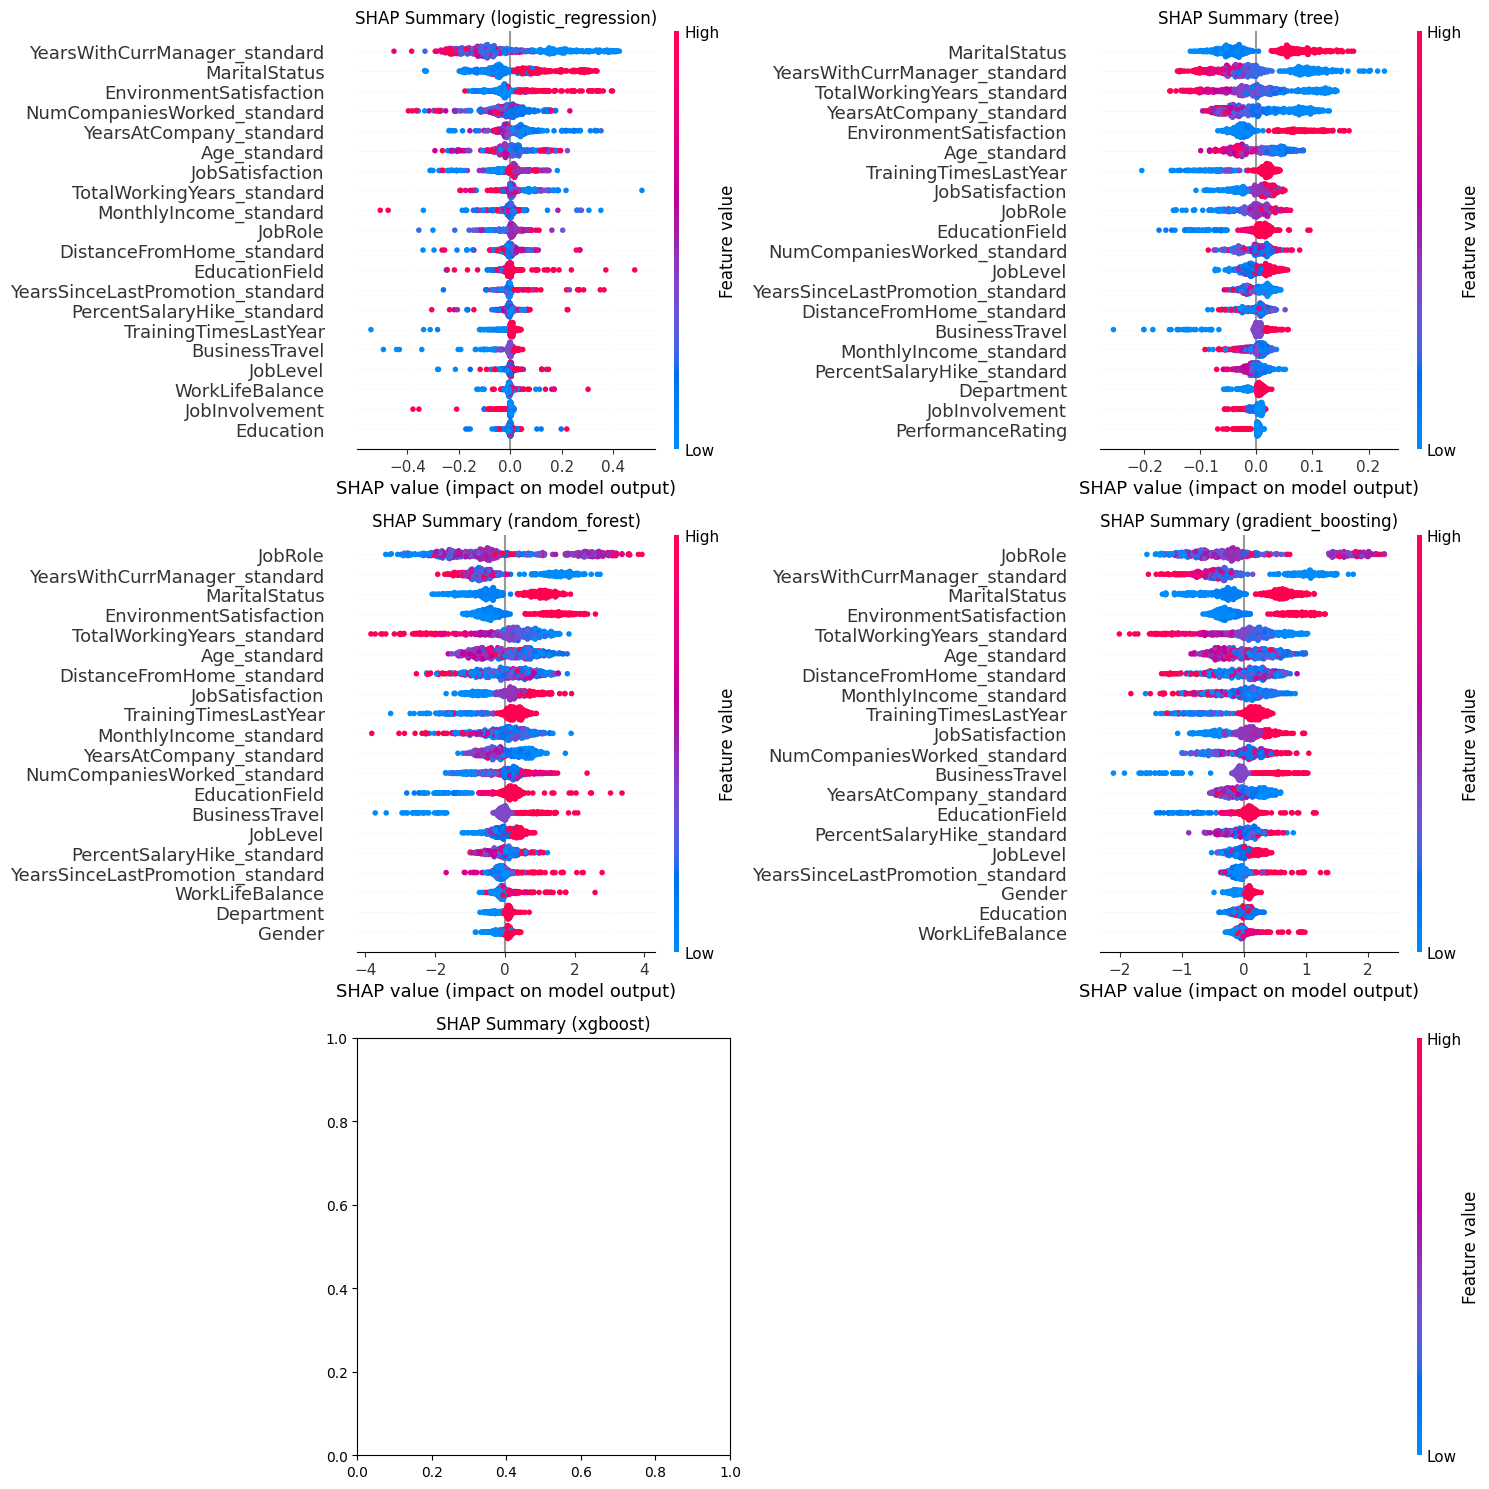

In [ ]:
analisis_mod_clas.shap_plots(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], plot_size=(15, 15), figsize=(10, 5))

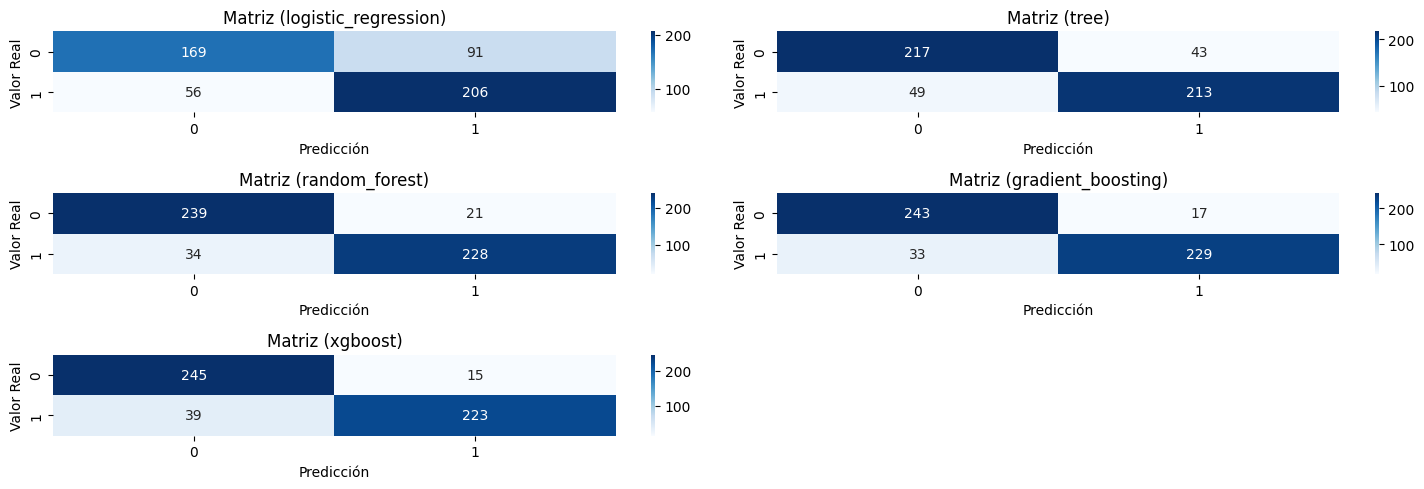

In [ ]:
analisis_mod_clas.matrices_confusion(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(15,5))

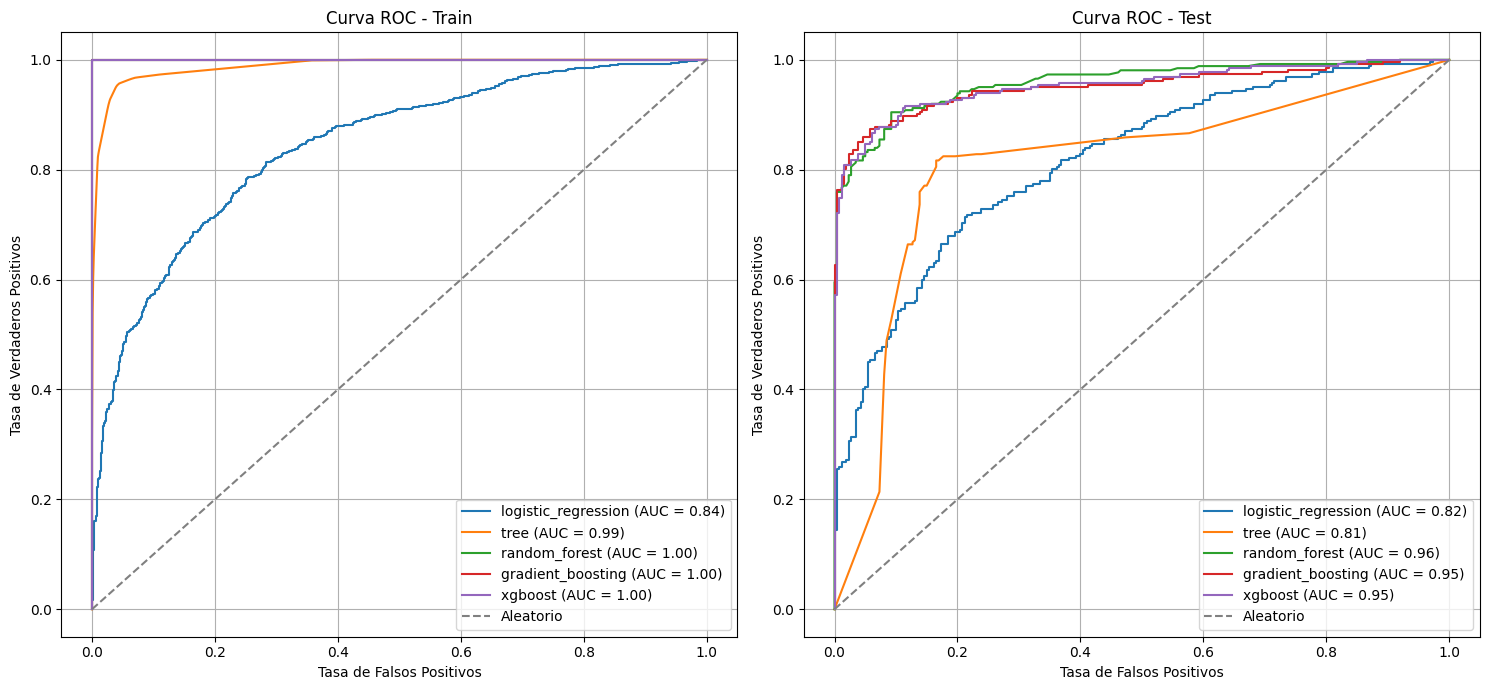

In [ ]:
analisis_mod_clas.curvas_roc_combinadas(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"])

La curva ROC es una representación visual del rendimiento del modelo en todos los umbrales. La curva ROC se dibuja calculando la tasa de verdaderos positivos (TPR) y una tasa de falsos positivos (FPR) en cada umbral posible. Un modelo perfecto, tiene en algún umbral tiene una TPR de 1.0 y una FPR de 0.0.

El área bajo la curva ROC (AUC) representa la probabilidad de que el modelo, si se da un ejemplo positivo y negativo elegido al azar, clasificará el positivo mayor que el negativo. El modelo perfecto anterior, que contiene un cuadrado con lados de longitud 1, tiene un área bajo la curva (AUC) de 1.0. Esto significa que hay un 100% de probabilidades de que el modelo clasificará de manera correcta un ejemplo positivo elegido al azar más alto que un ejemplo negativo elegido al azar. 